In [1]:
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

import warnings

warnings.filterwarnings("ignore")

# Data Access

## servers, servers everywhere and not a bit to flip

![](https://imgs.xkcd.com/comics/digital_data.png)

## whoami

`ocefpaf` (Filipe Fernandes)

- Physical Oceanographer
- Data Plumber
- Code Janitor
- CI babysitter
- package-Dash-Button for conda-forge

## My day job: IOOS

![](https://raw.githubusercontent.com/ocefpaf/2018-SciPy-talk/gh-pages/images/IOOS-RAs.jpg)

## Big or small we need data!

- There are various sources: variety of servers, APIs, and web services. Just to
  list a few: OPeNDAP, ERDDAP, THREDDS, ftp, http(s), S3, LAS, etc.

![](https://imgs.xkcd.com/comics/data_pipeline.png)

## Feedback

As you suffer from my tutorial on Data Access I'd love that you keep the following questions in mind so we can improve this tutorial. Should we focus on?

- Leveraging metadata for finding and exploring data?
- Software packages to access, slice, and dice data?
- Data sources?
- None of the above, we don't need this tutorial!

## Web Services/Type of servers

| Data Type                              | Web Service | Response    |
| -------------------------------------- | ----------- | ----------- |
| In-situ data<br>(buoys, stations, etc) | OGC SOS     | XML/CSV     |
| Gridded data (models, satellite)       | OPeNDAP     | Binary      |
| Raster Images                          | OGC WMS     | GeoTIFF/PNG |
| ERDDAP                                 | Restful API | \*          |

- Your imagination is the limit!
PS: There are also `stac` for images, cloud buckets for various formats, and many more.

## What are we going to see in this tutorial?

Browse and access data from:

1. ERDDAP
2. OPeNDAP
3. ~~SOS~~
4. WMS
5. CSW and CKAN\*


\* There are many examples on CSW in [the IOOS code lab] jupyter-book (https://ioos.github.io/ioos_code_lab/content/intro.html).

## 1) ERDDAP

### Learning objectives:

- Explore an ERDDAP server with the python interface (erddapy);
- Find a data for a time/region of interest;
- Download the data with a familiar format and create some plots.

## What is ERDDAP?

- Flexible outputs: .html table, ESRI .asc and .csv, .csvp, Google Earth .kml,
  OPeNDAP binary, .mat, .nc, ODV .txt, .tsv, .json, and .xhtml
- RESTful API to access the data
- Standardize dates and time in the results
- Server-side searching and slicing

In [2]:
from erddapy import ERDDAP

server = "http://erddap.dataexplorer.oceanobservatories.org/erddap"

e = ERDDAP(server=server, protocol="tabledap")

### What services are available in the server?

In [3]:
import pandas as pd

df = pd.read_csv(
    e.get_search_url(
        response="csv",
        search_for="all",
    )
)

In [4]:
print(
    f'We have {len(set(df["tabledap"].dropna()))} '
    f'tabledap, {len(set(df["griddap"].dropna()))} '
    f'griddap, and {len(set(df["wms"].dropna()))} wms.'
)

We have 600 tabledap, 0 griddap, and 0 wms.


### Let's query all the datasets that have the _standard_name_ of _sea_water_practical_salinity_.

In [5]:
url = e.get_categorize_url(
    categorize_by="standard_name",
    value="sea_water_practical_salinity",
    response="csv",
)

df = pd.read_csv(url)

dataset_ids = df.loc[
    ~df["tabledap"].isnull(), "Dataset ID"
].tolist()

dataset_ids_list = "\n".join(dataset_ids)
print(f"Found {len(dataset_ids)} datasets")

Found 379 datasets


### Let us narrow our search to deployments that within a lon/lat/time extent.

In [6]:
from ipyleaflet import FullScreenControl, Map, Rectangle

min_lon, max_lon = -72, -69
min_lat, max_lat = 38, 41

rectangle = Rectangle(bounds=((min_lat, min_lon), (max_lat, max_lon)))

m = Map(
    center=((min_lat + max_lat) / 2, (min_lon + max_lon) / 2),
    zoom=6,
)

m.add_layer(rectangle)
m.add_control(FullScreenControl())

In [7]:
m

Map(center=[39.5, -70.5], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [8]:
kw = {
    "min_time": "2016-07-10T00:00:00Z",
    "max_time": "2017-02-10T00:00:00Z",
    "min_lon": min_lon,
    "max_lon": max_lon,
    "min_lat": min_lat,
    "max_lat": max_lat,
    "standard_name": "sea_water_practical_salinity",
}

In [9]:
search_url = e.get_search_url(response="csv", **kw)
search = pd.read_csv(search_url)
dataset_ids = search["Dataset ID"].values

dataset_ids_list = "\n".join(dataset_ids)

In [10]:
print(f"Found {len(dataset_ids)} Datasets:\n{dataset_ids_list}")

Found 36 Datasets:
ooi-cp02pmci-wfp01-04-flortk000
ooi-cp02pmci-wfp01-03-ctdpfk000
ooi-cp02pmci-wfp01-02-dofstk000
ooi-cp02pmco-wfp01-04-flortk000
ooi-cp02pmco-wfp01-03-ctdpfk000
ooi-cp02pmco-wfp01-02-dofstk000
ooi-cp01cnsm-rid27-02-flortd000
ooi-cp01cnsm-rid27-03-ctdbpc000
ooi-cp01cnsm-rid27-04-dostad000
ooi-cp01cnsm-mfd37-03-ctdbpd000
ooi-cp01cnsm-mfd37-04-dostad000
ooi-cp01cnsm-sbd11-06-metbka000
ooi-cp01cnsm-sbd12-06-metbka000
ooi-cp01cnsm-sbd12-04-pco2aa000
ooi-cp03issm-rid27-02-flortd000
ooi-cp03issm-rid27-03-ctdbpc000
ooi-cp03issm-rid27-04-dostad000
ooi-cp03issm-mfd37-03-ctdbpd000
ooi-cp03issm-mfd37-04-dostad000
ooi-cp03issm-sbd11-06-metbka000
ooi-cp03issm-sbd12-04-pco2aa000
ooi-cp04ospm-wfp01-04-flortk000
ooi-cp04ospm-wfp01-03-ctdpfk000
ooi-cp04ospm-wfp01-02-dofstk000
ooi-cp04ossm-rid27-02-flortd000
ooi-cp04ossm-rid27-03-ctdbpc000
ooi-cp04ossm-rid27-04-dostad000
ooi-cp04ossm-mfd37-03-ctdbpe000
ooi-cp04ossm-mfd37-04-dostad000
ooi-cp04ossm-sbd11-06-metbka000
ooi-cp02pmui-wfp01-04

In [11]:
sal = "sea_water_practical_salinity_profiler_depth_enabled"
temp = "sea_water_temperature_profiler_depth_enabled"

e.dataset_id = dataset_ids[0]

e.variables = [
    "z",
    "latitude",
    "longitude",
    sal,
    temp,
    "time",
]

url = e.get_download_url()
print(url)

http://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-cp02pmci-wfp01-04-flortk000.html?z,latitude,longitude,sea_water_practical_salinity_profiler_depth_enabled,sea_water_temperature_profiler_depth_enabled,time


In [12]:
import pandas as pd

df = e.to_pandas(index_col="time (UTC)", parse_dates=True).dropna()

df.head()

,z (m),latitude (degrees_north),longitude (degrees_east),sea_water_practical_salinity_profiler_depth_enabled (1e-3),sea_water_temperature_profiler_depth_enabled (degree_Celsius)
time (UTC),,,,,
2014-04-17 01:02:00+00:00,-87.0,40.226983,-70.878183,33.479348,6.4195
2014-04-17 01:02:00+00:00,-86.0,40.226983,-70.878183,33.462495,6.4229
2014-04-17 01:02:00+00:00,-84.0,40.226983,-70.878183,33.445957,6.3958
2014-04-17 01:02:00+00:00,-83.0,40.226983,-70.878183,33.413812,6.3296
2014-04-17 01:02:00+00:00,-82.0,40.226983,-70.878183,33.371549,6.0903


Exercise: experiment with the `e.to_xarray()` method. Think about why/where use
one or the other?


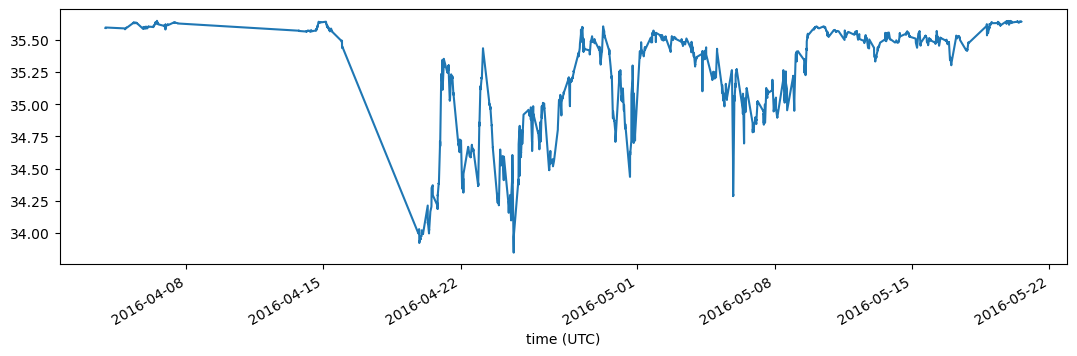

In [13]:
import matplotlib.pyplot as plt


subset = df.loc[df["z (m)"] == df["z (m)"].min()]

fig, ax = plt.subplots(figsize=(13, 3.75))
subset[f"{sal} (1e-3)"]["2016"].dropna().plot(ax=ax);

In [14]:
import gsw
import numpy as np


def plot_ts():
    fig, ax = plt.subplots(figsize=(5, 5))

    s = np.linspace(0, 42, 100)
    t = np.linspace(-2, 40, 100)

    s, t = np.meshgrid(s, t)
    sigma = gsw.sigma0(s, t)

    cnt = np.arange(-7, 40, 5)
    cs = ax.contour(s, t, sigma, colors="gray", levels=cnt)
    ax.clabel(cs, fontsize=9, inline=1, fmt="%2i")

    ax.set_xlabel("Salinity [g kg$^{-1}$]")
    ax.set_ylabel("Temperature [$^{\circ}$C]")
    ax.scatter(df[f"{sal} (1e-3)"], df[f"{temp} (degree_Celsius)"], s=10, alpha=0.25)

    ax.grid(True)
    ax.axis([20, 40, 4, 26])
    return fig, ax

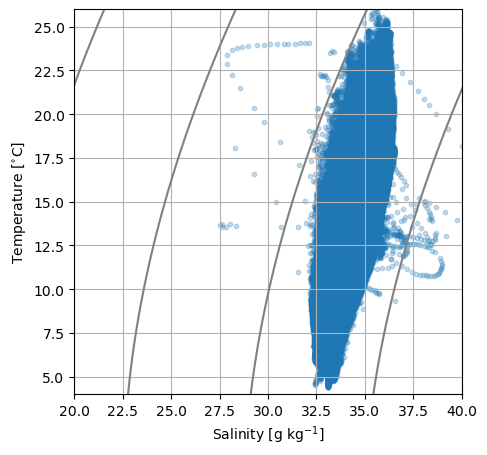

In [15]:
fig, ax = plot_ts();

In [16]:
responses = ["mat", "json", "ncCF", "ncCFHeader"]

for response in responses:
    print(f"{e.get_download_url(response=response)}\n")

http://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-cp02pmci-wfp01-04-flortk000.mat?z,latitude,longitude,sea_water_practical_salinity_profiler_depth_enabled,sea_water_temperature_profiler_depth_enabled,time

http://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-cp02pmci-wfp01-04-flortk000.json?z,latitude,longitude,sea_water_practical_salinity_profiler_depth_enabled,sea_water_temperature_profiler_depth_enabled,time

http://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-cp02pmci-wfp01-04-flortk000.ncCF?z,latitude,longitude,sea_water_practical_salinity_profiler_depth_enabled,sea_water_temperature_profiler_depth_enabled,time

http://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-cp02pmci-wfp01-04-flortk000.ncCFHeader?z,latitude,longitude,sea_water_practical_salinity_profiler_depth_enabled,sea_water_temperature_profiler_depth_enabled,time



Exercise: explore the web interface for the OOI server URL:

http://erddap.dataexplorer.oceanobservatories.org/erddap/index.html

or the IOOS glider dac:

https://gliders.ioos.us/erddap

and find a dataset of interested, download a format that you are familiar with
and plot it (using the web interface or the Python, your choice).


## 2) OPeNDAP

### Learning objectives:

- Open ocean model data from a THREDDS server via OPeNDAP using `xarray`;
- Discuss the differences with an `erddapy` request;
- Plot it using `xarray` interface.

In [17]:
import cf_xarray
import xarray as xr

url = (
    "http://tds.marine.rutgers.edu/thredds/dodsC/roms/doppio/"
    "2017_da/avg/Averages_Best"
)
ds = xr.open_dataset(url)
ds.cf


- CF Roles:   grid_topology: ['grid']

Coordinates:
- CF Axes: * Z: ['s_rho', 's_w']
           * T: ['ocean_time', 'time']
             X, Y: n/a

- CF Coordinates:   longitude: ['lon_psi', 'lon_rho', 'lon_u', 'lon_v']
                    latitude: ['lat_psi', 'lat_rho', 'lat_u', 'lat_v']
                  * vertical: ['s_rho', 's_w']
                  * time: ['ocean_time', 'time']

- Cell Measures:   area, volume: n/a

- Standard Names:   forecast_reference_time: ['time_run']
                    latitude: ['lat_psi', 'lat_rho', 'lat_u', 'lat_v']
                    longitude: ['lon_psi', 'lon_rho', 'lon_u', 'lon_v']
                  * ocean_s_coordinate_g2: ['s_rho', 's_w']
                  * time: ['time']

- Bounds:   n/a

Data Variables:
- Cell Measures:   area, volume: n/a

- Standard Names:   barotropic_eastward_sea_water_velocity: ['ubar_eastward']
                    barotropic_northward_sea_water_velocity: ['vbar_northward']
                    eastward_sea_water_velocity

In [18]:
variable = "sea_water_potential_temperature"
time = "2022-08-10"
surface = -1

selection = ds.cf[variable].sel(
    time="2022-08-10"
).isel(s_rho=surface)

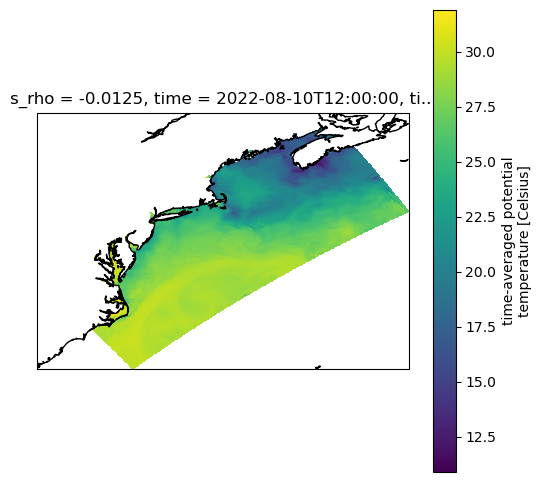

In [19]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig, ax = plt.subplots(
    figsize=(6, 6), subplot_kw={"projection": ccrs.PlateCarree()},
)

selection.plot(
    ax=ax,
    x="lon_rho",
    y="lat_rho",
)
ax.coastlines();

## 3) ~~SOS~~

### Learning objectives:

- Use searvey to obtain CO-OPS data

In [20]:
import shapely
from searvey import coops

secoora = shapely.geometry.box(-87.4, 24.25, -74.7, 36.7)
df = coops.coops_stations_within_region(secoora)
df

,nws_id,name,state,status,removed,geometry
nos_id,,,,,,
8726679,TSHF1,East Bay Causeway,FL,active,<NA>,POINT (-82.42575 27.92889)
8726694,TPAF1,TPA Cruise Terminal 2,FL,active,<NA>,POINT (-82.43330 27.93330)
8720233,BLIF1,Blount Island Command,FL,active,"2017-01-16 14:35:00,2017-01-16 14:30:00,2013-1...",POINT (-81.52253 30.39258)
8720228,LTJF1,Little Jetties Visibility,FL,active,"2017-02-21 18:00:00,2014-02-06 00:00:00",POINT (-81.44603 30.37936)
8726520,SAPF1,"St. Petersburg, Tampa Bay",FL,active,"2017-06-30 00:00:00,2017-01-17 00:00:00,2016-0...",POINT (-82.62689 27.76061)
8726724,CWBF1,Clearwater Beach,FL,active,"2019-03-13 17:42:00,2018-01-17 16:18:00,2017-0...",POINT (-82.83170 27.97830)
8727520,CKYF1,Cedar Key,FL,active,"2019-12-14 20:58:00,2019-12-12 00:00:00,2017-0...",POINT (-83.03170 29.13500)
8728690,APCF1,Apalachicola,FL,active,"2019-12-17 00:00:00,2019-12-10 16:15:00,2018-1...",POINT (-84.98170 29.72670)
8720030,FRDF1,Fernandina Beach,FL,active,"2020-01-18 00:00:00,2017-01-12 00:00:00,2016-0...",POINT (-81.46500 30.67170)


In [21]:
df.loc[df["name"] == "Duck"]

,nws_id,name,state,status,removed,geometry
nos_id,,,,,,
8651370,DUKN7,Duck,NC,active,"2022-01-19 11:00:00,2021-10-18 00:00:00,2021-1...",POINT (-75.74670 36.18330)


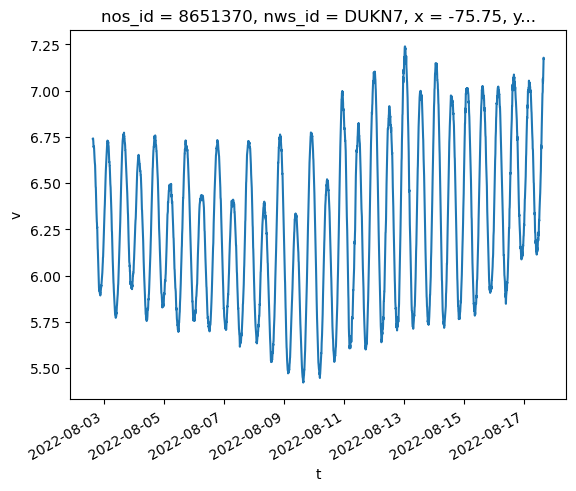

In [22]:
from datetime import datetime, timedelta
from searvey.coops import COOPS_Station

station = COOPS_Station("Duck")

ds = station.product(
    "water_level",
    start_date=datetime.today() - timedelta(15),
    end_date=datetime.today(),
)

ds["v"].plot();

## 4) WMS

### Learning objectives:

- Add a WMS layer to an interactive map. ("Hurricane viz widget.")

In [23]:
from ipyleaflet import FullScreenControl, Map, WMSLayer, basemaps
from ipywidgets import SelectionSlider
from traitlets import Unicode

time_options = [
    "13:00", "13:30", "14:00", "14:30", "15:00", "15:30",
    "16:00", "16:30", "17:00", "17:30", "18:00", "18:30",
]

slider = SelectionSlider(description="Time:", options=time_options)


def update_wms(change):
    time_wms.time = "2020-07-25T{}".format(slider.value)


slider.observe(update_wms, "value")


class TimeWMSLayer(WMSLayer):
    time = Unicode("").tag(sync=True, o=True)

In [24]:
time_wms = TimeWMSLayer(
    url="https://mesonet.agron.iastate.edu/cgi-bin/wms/nexrad/n0r-t.cgi?",
    layers="nexrad-n0r-wmst",
    time="2020-07-25T13:00:00Z",
    format="image/png",
    transparent=True,
    attribution="Weather data © 2012 IEM Nexrad",
)
m = Map(basemap=basemaps.CartoDB.Positron, center=(30, -88), zoom=5)
m.add_layer(time_wms)
m.add_control(FullScreenControl())

In [25]:
m

Map(center=[30, -88], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…

In [26]:
slider

SelectionSlider(description='Time:', options=('13:00', '13:30', '14:00', '14:30', '15:00', '15:30', '16:00', '…

## 5) Catalog Service Web (CSW)

### Is there a canonical source for data?

![](https://i.kym-cdn.com/photos/images/newsfeed/001/093/557/142.gif)

Well, kind of... The closet thing are data catalogs like the [IOOS CSW catalog](https://data.ioos.us/) or [pangeo-forge](https://pangeo-forge.readthedocs.io/en/latest/).

## Catalog Service for the Web (CSW)

- A single source to find endpoints
- Nice python interface:<br>`owslib.csw.CatalogueServiceWeb`
- Advanced filtering:<br>`owslib.fes`

![](https://raw.githubusercontent.com/ocefpaf/2018-SciPy-talk/gh-pages/images/IOOS.svg)

## IOOS CodeLab
For more complex examples on how to find data in the catalog please check the [IOOS code gallery](https://ioos.github.io/ioos_code_lab/content/intro.html).

![](static/ioos_code_lab.png)

## Where to find data?

Curated list of ERDDAP servers:
https://github.com/IrishMarineInstitute/awesome-erddap

Environmental Data Service (EDS) model viewer: https://eds.ioos.us

Exploring THREDDS servers: https://unidata.github.io/siphon/latest

## Extras: how does this all work?

## Standards!

![](https://imgs.xkcd.com/comics/standards.png)

## Bad example

In [27]:
import cftime
import nc_time_axis
from netCDF4 import Dataset

url = "http://goosbrasil.org:8080/pirata/B19s34w.nc"
nc = Dataset(url)

temp = nc["temperature"][:]
times = nc["time"]
temp[temp <= -9999] = np.NaN
t = cftime.num2date(times[:], times.units, calendar=times.calendar)
mask = (t >= datetime(2008, 1, 1)) & (t <= datetime(2008, 12, 31))

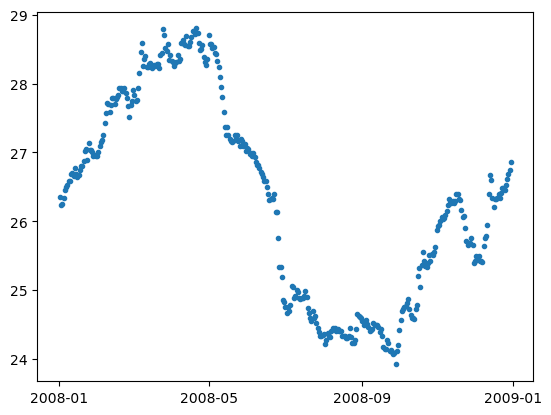

In [29]:
fig, ax = plt.subplots()
ax.plot(t[mask], temp[:, 0][mask], ".");

## Good example

In [30]:
import xarray as xr

ds = xr.open_dataset(url)
temp = ds["temperature"]

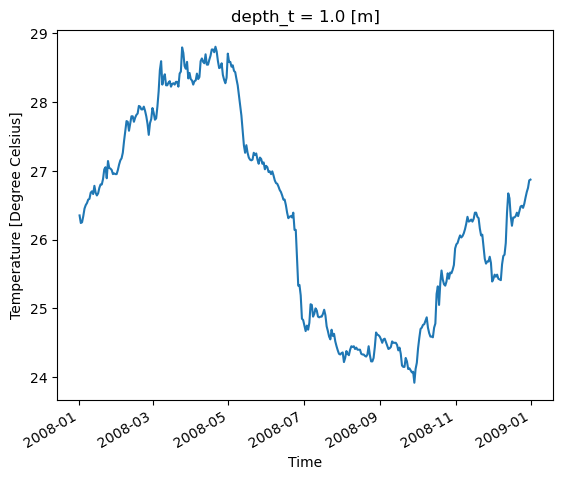

In [31]:
temp.sel(depth_t=1.0, time="2008").plot();